
# PROJECT 1

Submitted To: `Dr. Hasan Sajid`                                              
Submitted By: `Usman Zaheer`, Roll No: `13194`, Registration Number: `00000327700` 
RIME: `2020`  Subject: `Machine Learning`


### Problem Statement
#### Write complete code to train a linear/non-linear model for predicting corona cases in USA and world with regularization.
-  In this model, linear regression model with regularization is implemented for predicting corona cases in USA different states.

### Multivariate Linear Regression Model for Predicting Corona Cases in USA

### Step 1:  Importing necesaary libraries for the model.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Useful links from where data was taken and cleaned for this specific model.

For corona cases data
- 1) https://covidtracking.com/data/api   

For weather states temperarure avg data
- 2) https://www.weatherbase.com/weather/state.php3?c=US&name=United+States+of+America

For humidity data of states 
- 3) https://www.currentresults.com/Weather/US/annual-average-humidity-by-state.php-main
- https://www.forbes.com/sites/brianbrettschneider/2018/08/23/oh-the-humidity-why-is-alaska-the-most-humid-state/?sh=72a82a2e330c

Population density 
- 4)https://worldpopulationreview.com/state-rankings/state-densities

Simple population
- 5)https://www.worldometers.info/coronavirus/country/us/

### Step 2: Importing csv file of USA Data using pandas

`USA Final` is the name of csv file which will be converted to dataframe (df) using pandas. 

In [9]:
df=pd.read_csv('USA Final.csv')

Imported Data named `df` 

In [10]:
df

,Date,XO,Date_Code,States_Code,Temperatures_(F),Humidity_(%),Population_per_state,LandArea_(sq miles),Population_Density,Cases_per_day
0,12/6/2020,1,0,1,11.6,77.1,731545,570641,1.29,757
1,12/6/2020,1,0,2,46.6,71.6,4903185,50645,96.92,2288
2,12/6/2020,1,0,3,41.3,70.9,3017804,52035,58.40,1542
3,12/6/2020,1,0,4,38.0,80.0,55138,77,716.00,0
4,12/6/2020,1,0,5,43.6,38.5,7278717,113594,64.95,5376
...,...,...,...,...,...,...,...,...,...,...
14835,3/17/2020,1,264,52,28.6,71.7,623989,9217,68.14,5
14836,3/17/2020,1,264,53,41.4,71.4,7614893,66456,117.33,264
14837,3/17/2020,1,264,54,30.0,71.6,5822434,54158,108.05,27
14838,3/17/2020,1,264,55,41.0,69.7,1792147,24038,73.97,0


### Step 3: Cleaning Data frame 

In [11]:
df.dtypes

Date                      object
XO                         int64
Date_Code                  int64
States_Code                int64
Temperatures_(F)         float64
Humidity_(%)             float64
Population_per_state       int64
LandArea_(sq miles)        int64
Population_Density        object
Cases_per_day              int64
dtype: object

Population Desnsity column is object type, so it will converted to float.

In [12]:
df["Population_Density"]= df["Population_Density"].astype(float)

In [13]:
df.dtypes

Date                      object
XO                         int64
Date_Code                  int64
States_Code                int64
Temperatures_(F)         float64
Humidity_(%)             float64
Population_per_state       int64
LandArea_(sq miles)        int64
Population_Density       float64
Cases_per_day              int64
dtype: object

 Here, We have 8 valid features:

    - *1) XO (Bias Term) = 1
    - *2) DATE_CODE = In this model "date" is numerically coded. For example: 
        Model date starts from 6th December 2020 and ends at 17th March 2020.
        - *Here: 17th march 2020 is 264 and 6th December is 0.
    - *3) States_Code: States codes are also numerically coded. For example:
         *Here: 1 = Alaska, 2= Alabama and 56=Wyoming.
    - *4) Temperatures_(F): Tempearures in F of particular state at particular date. 
    - *5) Humidity_(%): Average humidity in % of particular state at particular date. 
    - *6) Population_per_state: Average populationin of particular state at particular date.  
    - *7) LandArea_(sq miles): Land Area in square miles of particular state .
    - *8) POPULATION_DENSITY: Population Density of particular state. 
        
 Here, We have 1 label : Cases_per_day in particulat state at particular date

### Step 4: Assigning features of model to `x` and prediction label to `y`

Assigning the features columns to x and label column (Cases per day) to y.

In [20]:
x=df.drop(["Date",'Cases_per_day'], axis=1)
x.head()

,XO,Date_Code,States_Code,Temperatures_(F),Humidity_(%),Population_per_state,LandArea_(sq miles),Population_Density
0,1,0,1,11.6,77.1,731545,570641,1.29
1,1,0,2,46.6,71.6,4903185,50645,96.92
2,1,0,3,41.3,70.9,3017804,52035,58.40
3,1,0,4,38.0,80.0,55138,77,716.00
4,1,0,5,43.6,38.5,7278717,113594,64.95


Assigning prediction label "Cases_per_day" to `y`

In [21]:
y=df["Cases_per_day"]
y.head()

0     757
1    2288
2    1542
3       0
4    5376
Name: Cases_per_day, dtype: int64

In [22]:
x.max(), x.min()

(XO                              1.0
 Date_Code                     264.0
 States_Code                    56.0
 Temperatures_(F)               82.8
 Humidity_(%)                   80.0
 Population_per_state     39512223.0
 LandArea_(sq miles)        570641.0
 Population_Density          11535.0
 dtype: float64,
 XO                           1.00
 Date_Code                    0.00
 States_Code                  1.00
 Temperatures_(F)             0.00
 Humidity_(%)                38.30
 Population_per_state     55138.00
 LandArea_(sq miles)         68.00
 Population_Density           1.29
 dtype: float64)

### Step 5: Normalization/ Scaling of features between 0 and 1

In [23]:
for j in range(0, len(x.columns)):
    x=(x-x.min())/(x.max()-x.min())

In [24]:
x.head()

,XO,Date_Code,States_Code,Temperatures_(F),Humidity_(%),Population_per_state,LandArea_(sq miles),Population_Density
0,NaN,0.0,0.000000,0.140097,0.930456,0.017143,1.000000,0.000000
1,NaN,0.0,0.018182,0.562802,0.798561,0.122869,0.088642,0.008291
2,NaN,0.0,0.036364,0.498792,0.781775,0.075086,0.091079,0.004952
3,NaN,0.0,0.054545,0.458937,1.000000,0.000000,0.000016,0.061967
4,NaN,0.0,0.072727,0.526570,0.004796,0.183074,0.198968,0.005519


In [25]:
x["XO"]=x["XO"].fillna(1)

In [26]:
len(x.columns)

8

Scaled Features between 0 and 1

In [27]:
x.head()

,XO,Date_Code,States_Code,Temperatures_(F),Humidity_(%),Population_per_state,LandArea_(sq miles),Population_Density
0,1.0,0.0,0.000000,0.140097,0.930456,0.017143,1.000000,0.000000
1,1.0,0.0,0.018182,0.562802,0.798561,0.122869,0.088642,0.008291
2,1.0,0.0,0.036364,0.498792,0.781775,0.075086,0.091079,0.004952
3,1.0,0.0,0.054545,0.458937,1.000000,0.000000,0.000016,0.061967
4,1.0,0.0,0.072727,0.526570,0.004796,0.183074,0.198968,0.005519


### Step 6: Splitting dataframe into training(60%) validation(20%) and testing data (20%) 

Now splitting the data into training, validation and testing data.


In [28]:
train_split=round(0.6*len(df))
valid_split=round(train_split+0.20*len(df))

x_train,y_train=x[:train_split],y[:train_split]
x_valid, y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test, y_test=x[valid_split:],y[valid_split:]

* x_train, y_train are features and label of training set.
* x_valid, y_valid are features and label of validation set.
* x_test, y_test are features and label of test set.


#### Now checking the x_train and y_train length to verify data split.

In [29]:
len(x_train), len(y_train) , len(x_valid)

(8904, 8904, 2968)

# Training Code

### Step 7:  Initiating Thetas(Model Parameters) and  defining Hypothesis for Linear Regression

As in this model Linear regression is applied, so Hypothesis is Thetas*x_train.
Here: 
    * Thetas= Model Parameters or weights for each feature.
    * x_train= Features of model 
In this model, there are total 8 feaures including the bias term Xo. So initiating 8 thetas of value = 0. 

In [30]:
Thetas=np.array([0]*len(x_train.columns))
Thetas

array([0, 0, 0, 0, 0, 0, 0, 0])

#### Hypothesis is given by following function:

In [31]:
def Hypothesis(Thetas,x_train):
    return Thetas*x_train

`m` is the length is our training set

In [33]:
m = len(x_train)
m

8904

### Step 8: Cost function 

Cost function is basically the difference between prediction by the model and the prediction label.Here, Regularization is also applied with Cost Function.
        
        *lambda_ is the regulzarization parameter.

#### Cost function is given by:


In [34]:
def Cost_Function(x_train,y_train,Thetas,lambda_):
    H=Hypothesis(Thetas,x_train)
    H=np.sum(H,axis=1)
    Cost=(np.sum(np.power((H-y_train),2))+lambda_*np.sum(np.power(Thetas[1:],2)))/(2*m)
    return Cost

In [35]:
n=len(x_valid)

In [36]:
def Cost_Function_valid(x_valid,y_valid,Thetas,lambda_):
    H=Hypothesis_v(Thetas,x_valid)
    H=np.sum(H,axis=1)
    Cost=(np.sum(np.power((H-y_valid),2))+lambda_*np.sum(np.power(Thetas[1:],2)))/(2*n)
    return Cost

### Step 9: Gradient Descent

Gradient Descenet is used to find the minimum values of thetas, so that our cost will be minimum. Mimimum cost indicates that the difference between our prediction and actual label is very low. 
Here, Regularization is also applied with Gradient Descnet to prevent overfitting




#### Gradient Descent is given by:

In [37]:
def Gradient_Descent(x_train, y_train, Thetas,lambda_, alpha, iterations):
    J_train = []  #cost of training set in each iterations is saved in this list
    J_valid = []  #cost of valid set in each iterations is saved in this list
    J_test =  []  #cost of test set in each iterations is saved in this list
    temp_var = 0
    while temp_var < iterations:        
        H = Hypothesis(Thetas, x_train)
        H = np.sum(H, axis=1)
        for  i in range(0, len(x_train.columns)):
            if i==0:
                Thetas[0]=Thetas[0]-alpha*(sum((H-y_train)*x_train.iloc[:,0])/(m))
            else:
                Thetas[i] = Thetas[i]*(1-alpha*(lambda_/m)) - alpha*(sum((H-y_train)*x_train.iloc[:,i])/(m))
                
                #thethas[i] = thethas[i] - alpha*(sum((H-y_train)*x_train.iloc[:,i])/(m))
        j_t = Cost_Function(x_train,y_train, Thetas,lambda_)
        J_train.append(j_t)
        j_v = Cost_Function_valid(x_valid,y_valid, Thetas,lambda_)
        J_valid.append(j_v)
        j_te = Cost_Function_valid(x_test,y_test, Thetas,lambda_)
        J_test.append(j_te)
        temp_var += 1
    return J_train,J_valid,J_test, j_t,j_v,j_te, Thetas

#### Calculating cost using gradient descent with the following parameters:
* alpha is learning rate =0.01
* Iterations is our loop running factor =2000
* lambda_ is regularization = 10

Here, when we put 
        
        *lambda_ = 0, there will no regularizarion

In [38]:
J_train,J_valid,J_test, j_t,j_v,j_te,Thetas = Gradient_Descent(x_train,y_train,Thetas,10,0.01,2000)

#### Thetas (paramters) of our model on training data are as follows:

In [39]:
Thetas

array([ 598,    0,    2,   24,  350, 2864,   56,    0])

In [40]:
 J_train[:5],J_valid[:5], J_test[:5]


([3126345.44681938,
  3088199.718780892,
  3053022.768976592,
  3019180.9576043244,
  2986070.103949517],
 [404530.01570733025,
  391788.7212958417,
  380573.43672683585,
  370321.0583992374,
  360865.09726979514],
 [604193.3338288635,
  592266.143645967,
  581804.488504365,
  572276.7593128103,
  563492.9124969577])

# Prediction Function Code

### Step 10: Calculating Predictions using Hypothesis function and model parameters

`py_train` is our prediction and we are applying our model parameters on training set to check the predictions and accuracy of our model.

In [41]:
py_train= Hypothesis(Thetas,x_train)
py_train= np.sum(py_train,axis=1)

In [42]:
py_train.head()

0    1032.118922
1    1247.900402
2    1103.810921
3     959.124467
4    1147.928876
dtype: float64

###  Step 10.1 Result Visualization

#### A)  Graph of Cost vs Iterations to check the working of our model. 
#### B)  Scattter plot for our predictions and y_train.

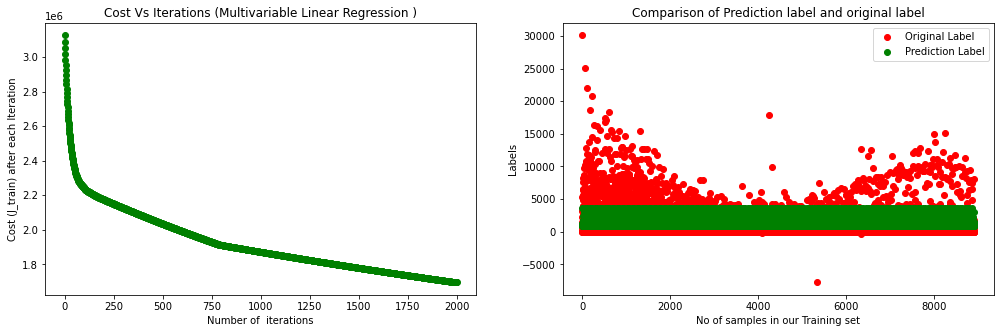

In [43]:
fig,(ax1,ax2)=plt.subplots(figsize=(17,5),
                          nrows=1,
                          ncols=2)
ax1.scatter(x=list(range(0,2000)),y=J_train,color='green')
ax1.set(xlabel='Number of  iterations',
      ylabel='Cost (J_train) after each Iteration',
      title='Cost Vs Iterations (Multivariable Linear Regression )')
ax2.scatter(x=list(range(0,len(x_train))),y=y_train,color='red',label='Original Label')
ax2.scatter(x=list(range(0,len(x_train))),y=py_train,color='green',label='Prediction Label')
ax2.set(xlabel='No of samples in our Training set',
       ylabel='Labels',
       title='Comparison of Prediction label and original label')
ax2.legend();

###  Step 10.2 Calculating Mean Absolute Error on training set

In [44]:
MAE_train=np.sum(np.absolute(y_train-py_train))/len(x_train)

MAE_train

1087.1478347699021

Mean absolute Error is `1087` for training set. It means that model is predicting `1087` values different from actual cases

### Step 11: Applying model paramters on validation data set

`py_validation` is our prediction on validation set and we are applying our model parameters on validation set to check the predictions and accuracy of our model.

In [45]:
py_validation= Hypothesis(Thetas,x_valid)
py_validation= np.sum(py_validation,axis=1)

In [46]:
py_validation.head()

8904    1043.771096
8905    1256.393156
8906    1114.071791
8907     948.109974
8908    1157.320180
dtype: float64

### Step 11.1 Result Visualization for validation data

#### Creating  scattter plots for our predictions on validation data and y_valid label.

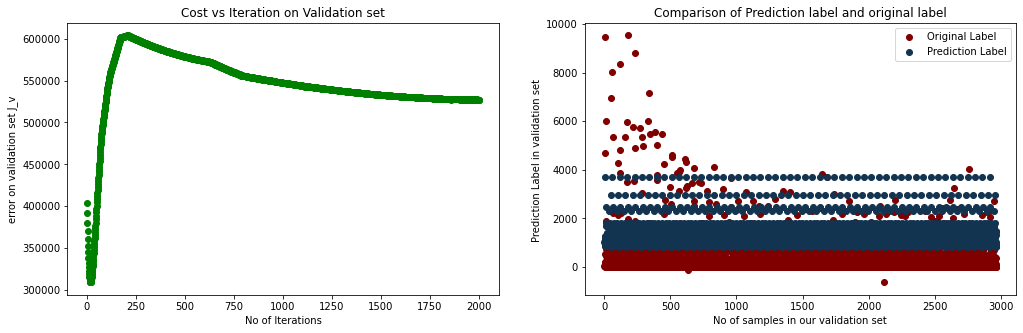

In [47]:
fig,(ax1,ax2)=plt.subplots(figsize=(17,5),
                          nrows=1,
                          ncols=2)
ax1.scatter(x=list(range(0,2000)),y=J_valid,color="green")
ax1.set(xlabel="No of Iterations", ylabel = "error on validation set J_v", title ="Cost vs Iteration on Validation set")
ax2.scatter(x=list(range(0,len(x_valid))),y=y_valid,color='maroon',label='Original Label')
ax2.scatter(x=list(range(0,len(x_valid))),y=py_validation,color='#123450',label='Prediction Label')
ax2.set(xlabel='No of samples in our validation set',
       ylabel='Prediction Label in validation set ',
       title='Comparison of Prediction label and original label')
ax2.legend();

### Step 11.2 Mean Absolute Error for validation set

In [48]:
MAE_validation=np.sum(np.absolute(y_valid-py_validation))/len(x_valid)
MAE_validation

932.9972011398406

Mean absolute Error is `932` for validation set. It means that model is predicting `932` values wrong from actual cases

### Step 12: Applying model paramters on test data set

`py_test` is our prediction on test set and we are applying our model parameters on test set to check the predictions and accuracy of our model.

In [49]:
py_test= Hypothesis(Thetas,x_test)
py_test= np.sum(py_test,axis=1)

In [50]:
py_test.head()

11872    1040.843559
11873    1254.596055
11874    1111.810921
11875     948.109974
11876    1154.682499
dtype: float64

### Step 12.1 Result Visualization for test data

 
#### Creating  scattter plots for our predictions on test data and y_test label.

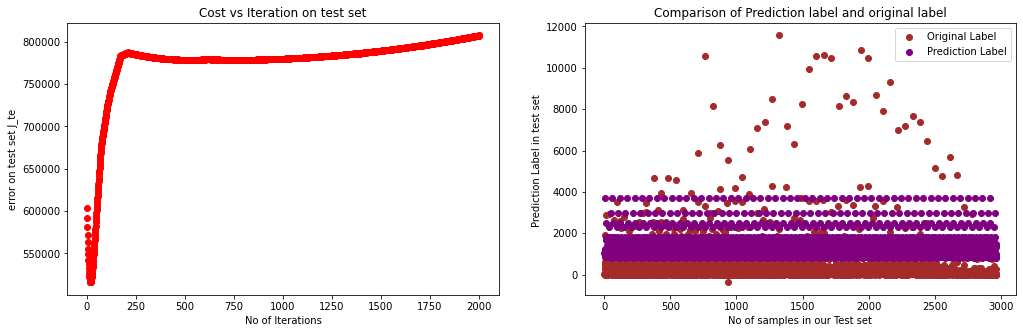

In [51]:
fig,(ax1,ax2)=plt.subplots(figsize=(17,5),
                          nrows=1,
                          ncols=2)
ax1.scatter(x=list(range(0,2000)),y=J_test,color="red")
ax1.set(xlabel="No of Iterations", ylabel = "error on test set J_te", title ="Cost vs Iteration on test set")
ax2.scatter(x=list(range(0,len(x_test))),y=y_test,color='brown',label='Original Label')
ax2.scatter(x=list(range(0,len(x_test))),y=py_test,color='purple',label='Prediction Label')
ax2.set(xlabel='No of samples in our Test set',
       ylabel='Prediction Label in test set ',
       title='Comparison of Prediction label and original label')
ax2.legend();

### Step 12.2 Mean Absolute Error for test set

In [52]:
MAE_test=np.sum(np.absolute(y_test-py_test))/len(x_test)
MAE_test

1068.2771819330865

Mean absolute Error is `1068.34` for test set. It means that model is predicting `1068` values wrong from actual cases in test set.

### Plot FOR ALL THREE ERRORS

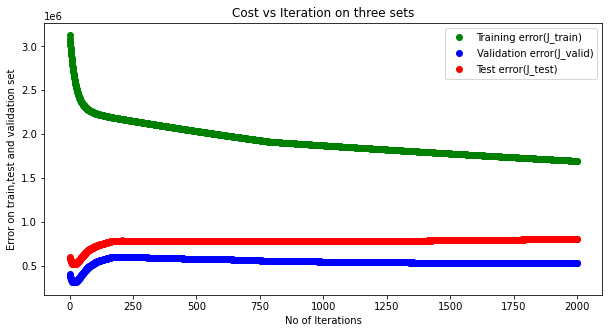

In [53]:
fig,(ax1)=plt.subplots(figsize=(10,5),
                          nrows=1,
                          ncols=1)
ax1.scatter(x=list(range(0,2000)),y=J_train,color='green',label='Training error(J_train)')
ax1.scatter(x=list(range(0,2000)),y=J_valid,color='blue',label='Validation error(J_valid)')
ax1.scatter(x=list(range(0,2000)),y=J_test,color="red",label='Test error(J_test)')
ax1.set(xlabel="No of Iterations", ylabel = "Error on train,test and validation set", title ="Cost vs Iteration on three sets")
ax1.legend();